In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bitstampUSD.csv')

In [ ]:
data = pd.read_csv('../../raw_data/bitstampUSD.csv')

In [ ]:
data.head()

In [ ]:
from BitcoinPrediction.preprocessing import preprocessing_data, features_target
from BitcoinPrediction.utils import select_date

In [ ]:
data = data[2798176:4727776].copy()

In [ ]:
data = select_date(data, date_start=None, date_end=None)

In [ ]:
data

In [3]:
mlflow_results = pd.read_csv('../../raw_data/runs.csv')

In [51]:
mlflow_results

,Run ID,Name,Source Type,Source Name,User,Status,a,b,buddy_name,date_end,...,coef_feature 94,coef_feature 95,coef_feature 96,coef_feature 97,coef_feature 98,coef_feature 99,mean_score,score_max,score_min,std
0,77e348fac18549399d4716d43449e986,NaN,NaN,NaN,unknown,RUNNING,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09e9fb659ee24c42b45b6d59e72c6561,NaN,NaN,NaN,unknown,RUNNING,NaN,NaN,{'Amelie'},2020,...,NaN,NaN,NaN,NaN,NaN,NaN,0.53,0.81,0.44,0.04
2,43f8cc8432fe4e7c847bae14999cd56c,NaN,NaN,NaN,unknown,RUNNING,NaN,NaN,{'Nicolas'},2020,...,NaN,NaN,NaN,NaN,NaN,NaN,0.53,0.55,0.51,0.01
3,cfdea7e137cf46dcbbc8ff0a7b8e789b,NaN,NaN,NaN,unknown,RUNNING,NaN,NaN,{'Nicolas'},2020,...,NaN,NaN,NaN,NaN,NaN,NaN,0.53,0.55,0.50,0.01
4,5bf0502fb1114413bbf553babcf40fc2,NaN,NaN,NaN,unknown,RUNNING,NaN,NaN,{'Caroline'},2020,...,-0.0004,0.0001,0.0002,-0.0002,0.0001,0.0,0.51,0.56,NaN,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,a2166898071f4f4488209e943e940b0e,NaN,NaN,NaN,unknown,RUNNING,NaN,NaN,NaN,2020-10-6,...,NaN,NaN,NaN,NaN,NaN,NaN,0.53,0.60,0.44,0.04
96,9cde955e6bb644d38d21992c66d2405a,NaN,NaN,NaN,unknown,RUNNING,NaN,NaN,NaN,2020-10-6,...,NaN,NaN,NaN,NaN,NaN,NaN,0.54,0.60,0.44,0.04
97,9818d31b4afb464fb8f6cbd1efb78b36,NaN,NaN,NaN,unknown,RUNNING,NaN,NaN,NaN,2020-10-6,...,NaN,NaN,NaN,NaN,NaN,NaN,0.53,0.65,0.42,0.05
98,11fbfc68dc804fe8bf2424f7a655e092,NaN,NaN,NaN,unknown,RUNNING,NaN,NaN,NaN,2020-10-6,...,NaN,NaN,NaN,NaN,NaN,NaN,0.54,0.63,0.48,0.04


In [4]:
mes_resultats = mlflow_results[mlflow_results['buddy_name'] == "{'Nicolas'}"].copy()

In [5]:
mes_resultats.drop(columns=['Run ID', 'Name', 'Source Type', 'Source Name', 'User', 'Status', 'a', 'b'], inplace=True)

In [ ]:
mes_resultats.drop(columns=['coef_feature 94', 'coef_feature 95', 'coef_feature 96', 'coef_feature 97', 'coef_feature 98', 'coef_feature 99'], inplace=True)

In [6]:
for i in range(60, 720):
    mes_resultats.drop(columns=f'coef_feature {i}', inplace=True)

In [ ]:
mes_resultats[['sample_size', 'mean_score', 'score_max', 'score_min', 'std']]

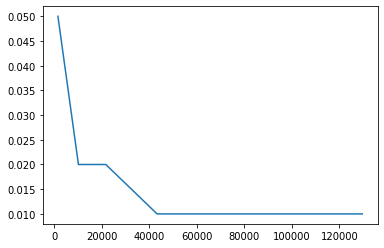

In [11]:
plt.plot(mes_resultats['sample_size'], mes_resultats['std']);
# plt.xscale('log');

In [17]:
mes_resultats.reset_index(drop=True, inplace=True)

In [21]:
mes_resultats

,buddy_name,date_end,date_start,features_size,h,model_init,sample_size,train_fraction,coef_feature 0,coef_feature 1,...,coef_feature 58,coef_feature 59,coef_feature 6,coef_feature 7,coef_feature 8,coef_feature 9,mean_score,score_max,score_min,std
0,{'Nicolas'},2020,2020,60.0,10.0,"RidgeClassifier(alpha=1.0, class_weight=None, ...",129600.0,0.7,-0.0055,0.0029,...,-0.0002,0.0007,0.0004,0.0000,0.0001,0.0002,0.53,0.55,0.51,0.01
1,{'Nicolas'},2020,2020,60.0,10.0,"RidgeClassifier(alpha=1.0, class_weight=None, ...",86400.0,0.7,-0.0056,0.0031,...,-0.0002,0.0006,0.0004,-0.0001,0.0001,0.0001,0.53,0.55,0.50,0.01
2,{'Nicolas'},2020,2020,60.0,10.0,"RidgeClassifier(alpha=1.0, class_weight=None, ...",43200.0,0.7,-0.0070,0.0038,...,-0.0002,0.0005,0.0004,0.0000,0.0001,0.0001,0.53,0.56,0.50,0.01
3,{'Nicolas'},2020,2020,60.0,10.0,"RidgeClassifier(alpha=1.0, class_weight=None, ...",21600.0,0.7,-0.0075,0.0041,...,-0.0002,0.0005,0.0004,0.0000,0.0002,0.0001,0.53,0.57,0.48,0.02
4,{'Nicolas'},2020,2020,60.0,10.0,"RidgeClassifier(alpha=1.0, class_weight=None, ...",14400.0,0.7,-0.0079,0.0043,...,-0.0002,0.0004,0.0005,-0.0001,0.0002,0.0001,0.53,0.58,0.46,0.02
5,{'Nicolas'},2020,2020,60.0,10.0,"RidgeClassifier(alpha=1.0, class_weight=None, ...",10080.0,0.7,-0.0083,0.0044,...,-0.0001,0.0004,0.0005,-0.0001,0.0002,0.0001,0.53,0.58,0.46,0.02
6,{'Nicolas'},2020,2020,60.0,10.0,"RidgeClassifier(alpha=1.0, class_weight=None, ...",1440.0,0.7,-0.0112,0.0048,...,0.0001,0.0001,0.0004,-0.0001,0.0002,0.0000,0.52,0.67,0.22,0.05


In [20]:
for i in range(60):
    print(mes_resultats[f'coef_feature {i}'][1])

-0.0056
0.0031
0.0005
0.0001
0.0
0.0004
0.0004
-0.0001
0.0001
0.0001
-0.0001
-0.0001
-0.0001
-0.0003
0.0
0.0
-0.0001
0.0001
0.0
-0.0002
0.0002
0.0001
0.0001
-0.0001
0.0
0.0001
0.0002
0.0002
0.0
0.0
-0.0001
-0.0001
0.0003
-0.0001
0.0001
0.0002
0.0
0.0001
0.0
0.0003
-0.0001
0.0
-0.0002
0.0001
-0.0001
0.0
0.0001
0.0
-0.0001
0.0002
0.0001
0.0001
0.0
-0.0001
0.0002
-0.0001
-0.0003
0.0
-0.0002
0.0006


In [22]:
test_heatmap = mes_resultats.drop(columns=['buddy_name', 'date_end', 'date_start', 'features_size', 'h', 'model_init', 'sample_size', 'train_fraction']).copy()

In [25]:
test_heatmap.drop(columns=['mean_score', 'score_max', 'score_min', 'std'], inplace=True)

In [35]:
test_heatmap

,coef_feature 0,coef_feature 1,coef_feature 10,coef_feature 11,coef_feature 12,coef_feature 13,coef_feature 14,coef_feature 15,coef_feature 16,coef_feature 17,...,coef_feature 54,coef_feature 55,coef_feature 56,coef_feature 57,coef_feature 58,coef_feature 59,coef_feature 6,coef_feature 7,coef_feature 8,coef_feature 9
0,-0.0055,0.0029,0.0000,-0.0001,-0.0001,-0.0003,0.0000,-0.0001,-0.0001,0.0000,...,0.0001,-0.0001,-0.0003,0.0000,-0.0002,0.0007,0.0004,0.0000,0.0001,0.0002
1,-0.0056,0.0031,-0.0001,-0.0001,-0.0001,-0.0003,0.0000,0.0000,-0.0001,0.0001,...,0.0002,-0.0001,-0.0003,0.0000,-0.0002,0.0006,0.0004,-0.0001,0.0001,0.0001
2,-0.0070,0.0038,0.0001,-0.0001,-0.0001,-0.0004,0.0002,-0.0002,-0.0001,0.0001,...,0.0000,-0.0001,-0.0002,-0.0001,-0.0002,0.0005,0.0004,0.0000,0.0001,0.0001
3,-0.0075,0.0041,0.0000,-0.0001,-0.0001,-0.0004,0.0001,-0.0002,-0.0001,0.0001,...,0.0001,0.0000,-0.0003,0.0000,-0.0002,0.0005,0.0004,0.0000,0.0002,0.0001
4,-0.0079,0.0043,0.0001,-0.0002,-0.0001,-0.0003,0.0001,-0.0002,-0.0001,0.0001,...,0.0001,0.0000,-0.0003,0.0000,-0.0002,0.0004,0.0005,-0.0001,0.0002,0.0001
5,-0.0083,0.0044,0.0001,-0.0002,0.0000,-0.0004,0.0001,-0.0002,-0.0001,0.0002,...,0.0000,-0.0001,-0.0002,0.0000,-0.0001,0.0004,0.0005,-0.0001,0.0002,0.0001
6,-0.0112,0.0048,0.0000,-0.0003,-0.0002,-0.0005,0.0001,-0.0003,-0.0001,0.0002,...,0.0001,0.0000,-0.0002,0.0000,0.0001,0.0001,0.0004,-0.0001,0.0002,0.0000


In [36]:
weights = []
for i in range(60):
    score = test_heatmap[f'coef_feature {i}'][0]
    weights.append(score)

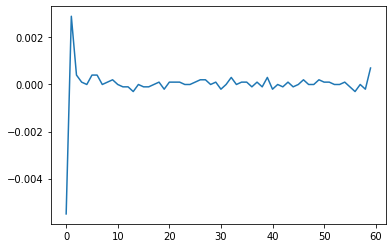

In [38]:
plt.plot(weights)

In [39]:
import seaborn as sns

In [45]:
np.array(weights).reshape(60,1).shape

(60, 1)

<AxesSubplot:>

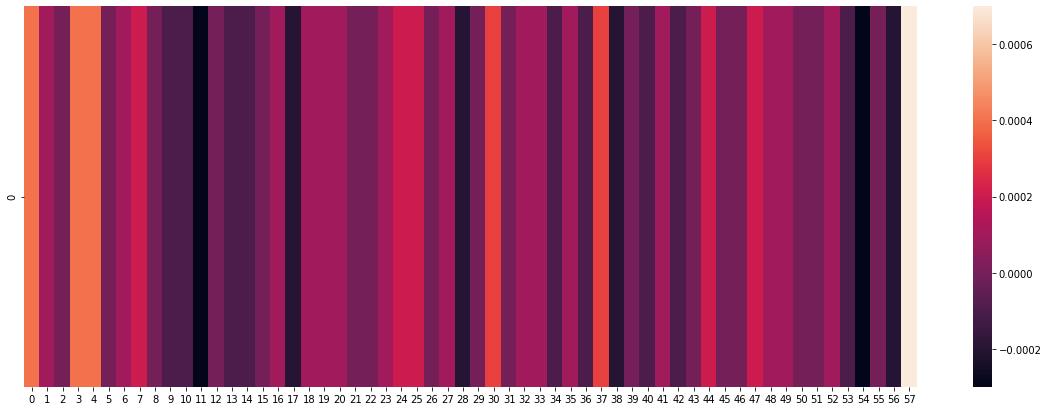

In [50]:
plt.figure(figsize=(20,7))
sns.heatmap(np.array(weights[2:]).reshape(1,58))